In [ ]:
# import the pandas
import pandas as pd
data = pd.read_csv('studentclusters.csv')

In [ ]:
data.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


In [ ]:
data.isnull().sum(axis=0)

marks     0
shours    0
dtype: int64

In [ ]:
x = data.copy()

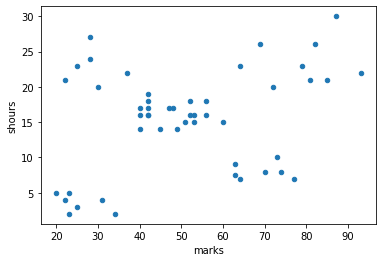

In [ ]:
# visualize the data using pandas
x.plot.scatter(x = 'marks', y = 'shours')

In [ ]:
# Normalize the data using standard or min-max
from sklearn.preprocessing import minmax_scale
x_scaled = minmax_scale(x)
x_scaled

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [ ]:
#  import KMeans
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1234)

In [ ]:
kmeans.fit(x_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1], dtype=int32)

In [ ]:
# visualize the cluster
labels = pd.DataFrame(labels)
df = pd.concat([x,labels],axis=1)


In [ ]:
df.columns

Index(['marks', 'shours', 0], dtype='object')

In [ ]:
df = df.rename(columns={0:'labels'})

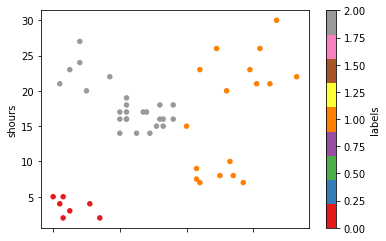

In [ ]:
df.plot.scatter(x='marks',y = 'shours',c = 'labels',colormap='Set1')

In [ ]:
# Elbow method
inertia = []
for i in range(2,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)


**inertia** is a sum of squared distance.
**Elbow method** plot used to understand distance between cluster


In [ ]:
inertia

[4.103170007324023,
 2.410310335699033,
 1.155791015307772,
 0.5752619558845887,
 0.4643290198437524,
 0.3644673630086283,
 0.2985081486351612,
 0.2648783024053253,
 0.23743809542957733,
 0.2192342684187401,
 0.1984819497793487,
 0.16910643568407707,
 0.15411796505366393]

Text(0, 0.5, 'sum of squared (inertia)')

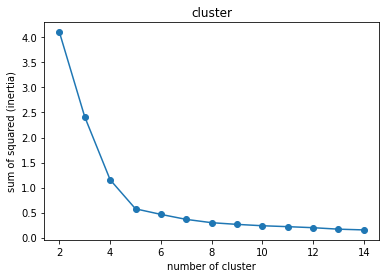

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2,15),inertia, marker = 'o' )
plt.title('cluster')
plt.xlabel('number of cluster')
plt.ylabel('sum of squared (inertia)')